In [1]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.3/789.3 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 1.4 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch

from dataset import *
from model import ResNet18
from unlearn import *
from metrics import UnLearningScore
from utils import *
from torch.utils.data import DataLoader

/home/sahil/anaconda3/envs/deeplearning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-17 06:45:30.674103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Check if CUDA is available
cuda_available = torch.cuda.is_available()

if cuda_available:
    # Get the number of CUDA devices
    num_cuda_devices = torch.cuda.device_count()
    print("CUDA is available with", num_cuda_devices, "device(s) available.")
else:
    print("CUDA is not available.")

CUDA is available with 1 device(s) available.


In [3]:
train_ds = CustomCIFAR100(root='.', train=True,download=True, transform=transform_train)
valid_ds = CustomCIFAR100(root='.', train=False,download=True, transform=transform_train)

batch_size = 256
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=32, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size, num_workers=32, pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


/home/sahil/anaconda3/envs/deeplearning/lib/python3.11/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 16, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


100%|██████████| 169001437/169001437 [04:47<00:00, 588097.11it/s] 


Extracting ./data/cifar-100-python.tar.gz to ./data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 19, Coarse Label: 11


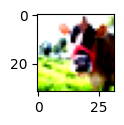

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 29, Coarse Label: 15


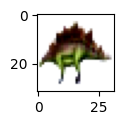

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 0, Coarse Label: 4


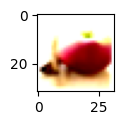

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 11, Coarse Label: 14


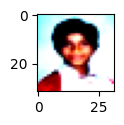

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 1, Coarse Label: 1


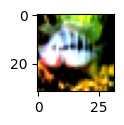

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 86, Coarse Label: 5


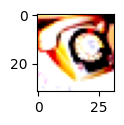

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 90, Coarse Label: 18


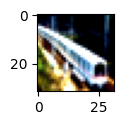

Fine Label: 28, Coarse Label: 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


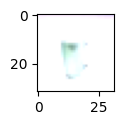

Fine Label: 23, Coarse Label: 10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


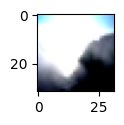

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 31, Coarse Label: 11


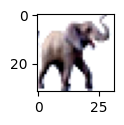

Fine Label: 39, Coarse Label: 5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


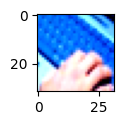

Fine Label: 96, Coarse Label: 17


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


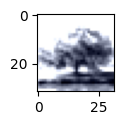

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 82, Coarse Label: 2


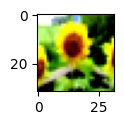

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 17, Coarse Label: 9


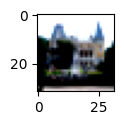

Fine Label: 71, Coarse Label: 10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


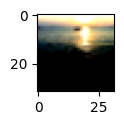

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 39, Coarse Label: 5


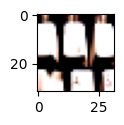

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 8, Coarse Label: 18


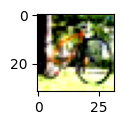

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 97, Coarse Label: 8


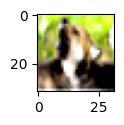

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 80, Coarse Label: 16


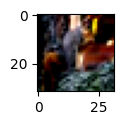

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 71, Coarse Label: 10


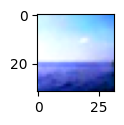

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 74, Coarse Label: 16


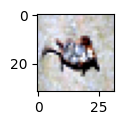

Fine Label: 59, Coarse Label: 17


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


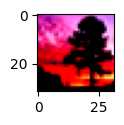

Fine Label: 70, Coarse Label: 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


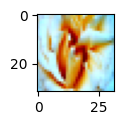

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 87, Coarse Label: 5


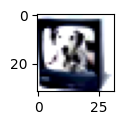

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 59, Coarse Label: 17


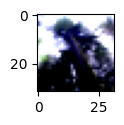

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 84, Coarse Label: 6


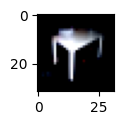

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 64, Coarse Label: 12


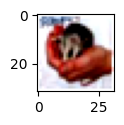

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 52, Coarse Label: 17


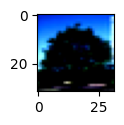

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 42, Coarse Label: 8


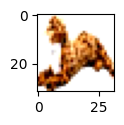

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 64, Coarse Label: 12


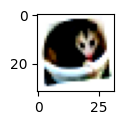

Fine Label: 8, Coarse Label: 18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


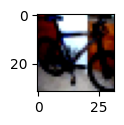

Fine Label: 17, Coarse Label: 9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


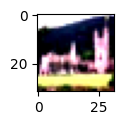

Fine Label: 47, Coarse Label: 17


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


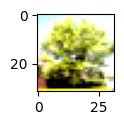

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 65, Coarse Label: 16


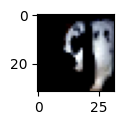

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 21, Coarse Label: 11


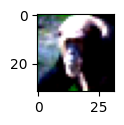

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 22, Coarse Label: 5


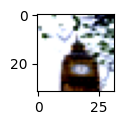

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 81, Coarse Label: 19


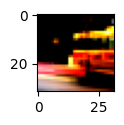

Fine Label: 11, Coarse Label: 14


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


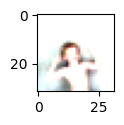

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 24, Coarse Label: 7


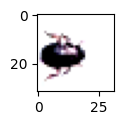

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 84, Coarse Label: 6


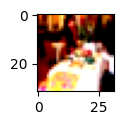

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 78, Coarse Label: 15


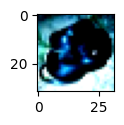

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 45, Coarse Label: 13


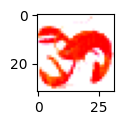

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 49, Coarse Label: 10


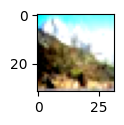

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 97, Coarse Label: 8


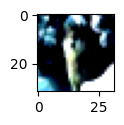

Fine Label: 56, Coarse Label: 17


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


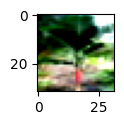

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 76, Coarse Label: 9


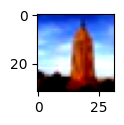

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 11, Coarse Label: 14


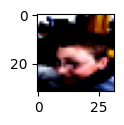

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 90, Coarse Label: 18


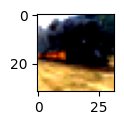

Fine Label: 89, Coarse Label: 19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


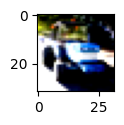

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fine Label: 78, Coarse Label: 15


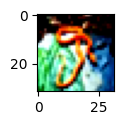

In [193]:
dataset = CustomCIFAR100(root='./data', train=True, download=True, transform=transform_train)

# Access an item using __getitem__
for index in range(0,50) :
  image, fine_label, coarse_label = dataset[index]

  # Print the labels and display the image using matplotlib
  import matplotlib.pyplot as plt
  import numpy as np

  # Function to convert tensor to numpy array
  def imshow(img, figsize=(1, 1)):  # Define figsize for the plot
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=figsize)  # Set the figure size
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


  print(f"Fine Label: {fine_label}, Coarse Label: {coarse_label}")
  imshow(image)

In [4]:
num_classes = 100
classwise_train = {}
for i in range(num_classes):
    classwise_train[i] = []

for img, label, clabel in train_ds:
    classwise_train[label].append((img, label, clabel))
    
classwise_test = {}
for i in range(num_classes):
    classwise_test[i] = []

for img, label, clabel in valid_ds:
    classwise_test[label].append((img, label, clabel))

In [5]:
# train the model
device = 'cuda'
model = ResNet18(num_classes = 20, pretrained = True).to(device)
epochs = 5
history = fit_one_cycle(epochs, model, train_dl, valid_dl, device = device)
torch.save(model.state_dict(), "ResNET18_CIFAR100Super20_Pretrained_ALL_CLASSES_5_Epochs.pt")

/home/sahil/anaconda3/envs/deeplearning/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sahil/anaconda3/envs/deeplearning/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [0], last_lr: 0.00100, train_loss: 2.0054, val_loss: 1.5527, val_acc: 51.6992
Epoch [1], last_lr: 0.00100, train_loss: 1.5767, val_loss: 2.1835, val_acc: 46.2988
Epoch [2], last_lr: 0.00100, train_loss: 3.4090, val_loss: 2.7453, val_acc: 20.0781
Epoch [3], last_lr: 0.00100, train_loss: 3.6092, val_loss: 3.1654, val_acc: 27.1387
Epoch [4], last_lr: 0.00100, train_loss: 3.4662, val_loss: 28.0093, val_acc: 26.3281
Epoch 00005: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00005: reducing learning rate of group 1 to 5.0000e-03.


In [6]:
# load the trained model
device = 'cuda'
model = ResNet18(num_classes = 20, pretrained = True).to(device)
model.load_state_dict(torch.load("ResNET18_CIFAR100Super20_Pretrained_ALL_CLASSES_5_Epochs.pt", map_location='cuda'))

<All keys matched successfully>

# Forgetting Individual Class

In [177]:
# Getting the forget and retain validation data
forget_valid = []
forget_classes = [69]
for cls in range(num_classes):
    if cls in forget_classes:
        for img, label, clabel in classwise_test[cls]:
            forget_valid.append((img, label, clabel))

retain_valid = []
for cls in range(num_classes):
    if cls not in forget_classes:
        for img, label, clabel in classwise_test[cls]:
            retain_valid.append((img, label, clabel))
            
forget_train = []
for cls in range(num_classes):
    if cls in forget_classes:
        for img, label, clabel in classwise_train[cls]:
            forget_train.append((img, label, clabel))

retain_train = []
for cls in range(num_classes):
    if cls not in forget_classes:
        for img, label, clabel in classwise_train[cls]:
            retain_train.append((img, label, clabel))

forget_valid_dl = DataLoader(forget_valid, batch_size, num_workers=32, pin_memory=True)

retain_valid_dl = DataLoader(retain_valid, batch_size, num_workers=32, pin_memory=True)

forget_train_dl = DataLoader(forget_train, batch_size, num_workers=32, pin_memory=True)
retain_train_dl = DataLoader(retain_train, batch_size, num_workers=32, pin_memory=True, shuffle = True)
import random
retain_train_subset = random.sample(retain_train, int(0.3*len(retain_train)))
retain_train_subset_dl = DataLoader(retain_train_subset, batch_size, num_workers=32, pin_memory=True, shuffle = True)

In [178]:
# Performance of Fully trained model on retain set
evaluate(model, retain_valid_dl, device)

{'Loss': 28.97176170349121, 'Acc': 26.81010627746582}

In [179]:
forget_train_dl

In [180]:
# Performance of Fully trained model on forget set
evaluate(model, forget_valid_dl, device)

{'Loss': 67.49957275390625, 'Acc': 1.0}

## Retrain the model from Scratch
Create Retrained Model (Gold model). This is the model trained from scratch without forget data.

In [181]:
device = 'cuda'
gold_model = ResNet18(num_classes = 20, pretrained = True).to(device)
epochs = 5
history = fit_one_cycle(epochs, gold_model, retain_train_dl, retain_valid_dl, device = device)
torch.save(gold_model.state_dict(), "ResNET18_CIFAR100Super20_Pretrained_Gold_Class69_5_Epochs.pt")

Epoch [0], last_lr: 0.00100, train_loss: 1.9013, val_loss: 1.5485, val_acc: 53.4527
Epoch [1], last_lr: 0.00100, train_loss: 1.4390, val_loss: 4.0420, val_acc: 47.1030
Epoch [2], last_lr: 0.00100, train_loss: 1.7189, val_loss: 3.5151, val_acc: 53.3106
Epoch [3], last_lr: 0.00100, train_loss: 1.3959, val_loss: 1.2780, val_acc: 61.5403
Epoch [4], last_lr: 0.00100, train_loss: 0.9489, val_loss: 1.2257, val_acc: 63.2570


In [182]:
device = 'cuda'
gold_model = ResNet18(num_classes = 20, pretrained = True).to(device)
gold_model.load_state_dict(torch.load("ResNET18_CIFAR100Super20_Pretrained_Gold_Class69_5_Epochs.pt", map_location=device))

<All keys matched successfully>

In [183]:
# evaluate gold model on retain set
evaluate(gold_model, retain_valid_dl, device)

{'Loss': 1.2256625890731812, 'Acc': 63.257022857666016}

In [184]:
# evaluate gold model on forget set
evaluate(gold_model, forget_valid_dl, device)

{'Loss': 5.92336368560791, 'Acc': 0.0}

## UnLearning via proposed method

In [185]:
device = 'cuda'
unlearning_teacher = ResNet18(num_classes = 20, pretrained = False).to(device).eval()
student_model = ResNet18(num_classes = 20, pretrained = False).to(device)
student_model.load_state_dict(torch.load("ResNET18_CIFAR100Super20_Pretrained_ALL_CLASSES_5_Epochs.pt", map_location = device))
model = model.eval()

KL_temperature = 1

optimizer = torch.optim.Adam(student_model.parameters(), lr = 0.0001)

blindspot_unlearner(model = student_model, unlearning_teacher = unlearning_teacher, full_trained_teacher = model, 
          retain_data = retain_train_subset, forget_data = forget_train, epochs = 1, optimizer = optimizer, lr = 0.0001, 
          batch_size = 256, num_workers = 32, device = device, KL_temperature = KL_temperature)

Epoch 1 Unlearning Loss 0.019559290260076523


In [186]:
# performance of unlearned model on retain set
evaluate(student_model, retain_valid_dl, device)

{'Loss': 3.7098193168640137, 'Acc': 27.445775985717773}

In [187]:
# performance of unlearned model on forget set
evaluate(student_model, forget_valid_dl, device)

{'Loss': 3.1950268745422363, 'Acc': 1.0}

### Measure ZRF (Unlearning Score)

In [188]:
print("Initial Score: {}".format(UnLearningScore(model, unlearning_teacher, forget_valid_dl, 256, 'cuda')))
print("Gold Score: {}".format(UnLearningScore(gold_model, unlearning_teacher, forget_valid_dl, 256, 'cuda')))
print("Our Score: {}".format(UnLearningScore(student_model, unlearning_teacher, forget_valid_dl, 256, 'cuda')))
print("JS Div: {}".format(1-UnLearningScore(gold_model, student_model, forget_valid_dl, 256, 'cuda')))

Initial Score: -inf
Gold Score: 0.9695302844047546
Our Score: 0.9872288107872009
JS Div: 0.03015303611755371


## Unlearning using Amnesiac unlearning

In [189]:
unlearninglabels = list(range(20))
unlearninglabels.remove(19)         #remove superclass
unlearning_train_set = []
for cls in range(num_classes):
    if cls in forget_classes:
        for img, label, clabel in classwise_train[cls]:
            unlearning_train_set.append((img, label, random.choice(unlearninglabels)))



for cls in range(num_classes):
    if cls not in forget_classes:
        for img, label, clabel in classwise_train[cls]:
            unlearning_train_set.append((img, label, clabel))

In [190]:
unlearning_train_set_dl = DataLoader(unlearning_train_set, batch_size, num_workers = 32, pin_memory = True, shuffle = True)

In [191]:
device = 'cuda'
student_model = ResNet18(num_classes = 20, pretrained = True).to(device)
student_model.load_state_dict(torch.load("ResNET18_CIFAR100Super20_Pretrained_ALL_CLASSES_5_Epochs.pt", map_location = 'cuda'))
epochs = 3

history = fit_one_unlearning_cycle(epochs, student_model, unlearning_train_set_dl, retain_valid_dl, device = device, lr = 0.0001)

Epoch [0], last_lr: 0.00010, train_loss: 3.0913, val_loss: 2.2461, val_acc: 37.2140
Epoch [1], last_lr: 0.00010, train_loss: 2.4945, val_loss: 2.6722, val_acc: 38.8319
Epoch [2], last_lr: 0.00010, train_loss: 2.2802, val_loss: 2.2121, val_acc: 39.9782


In [192]:
print("Retain Performance: {}".format(evaluate(student_model, retain_valid_dl, device)))
print("Forget Performance: {}".format(evaluate(student_model, forget_valid_dl, device)))

Retain Performance: {'Loss': 2.212104082107544, 'Acc': 39.978153228759766}
Forget Performance: {'Loss': 3.7776906490325928, 'Acc': 2.0}
